# Comparison of FEP predictions to experimental measurements

On May 27, 2020, Nir London's group of the COVID Moonshot team released _more_ experimental affinity measurements for compounds that were ordered.  See: 
https://postera.ai/covid/activity_data

As before, FEP calculations from Folding@home were not used to select these compounds (instead our goal is to help screen future rounds), many of these compounds are ones that we are simulating, enabling a comparison of our predictions so far.

### First, let's find the set of compounds for which both simulations and  experimental measurements exist

The latest CSV has been download locally:

In [1]:
import numpy as np
import pandas as pd
# local version as of May 29
# df_activity = pd.read_csv('activity_data.csv')

# latest post on Postera site:
df_activity = pd.read_csv('https://postera.ai/covid/activity_data.csv')

df_activity.columns

Index(['SMILES', 'CID', 'canonical_CID', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_IC50', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50',
       'f_max_inhibition_reading', 'f_min_inhibition_reading', 'f_hill_slope',
       'f_R2', 'relative_solubility_at_20_uM', 'relative_solubility_at_100_uM',
       'trypsin_IC50'],
      dtype='object')

Notes on these columns:

* The `'r_'` prefix denotes measurements made on a RapidFire (high-throughput Mass Spec from Agilent)
* The `'f_'` prefix denotes measurements made by fluorescence

Like before, compounds were initially screened at 20 $\mu$M and 50 $\mu$M.  Strong inhibition was further screened at a number of concentrations to calculate the IC50 values.

When we compare the IC50s for the two methods, they agree pretty well:

(Uh....maybe.  I'm confused!   https://discuss.postera.ai/t/latest-activity-data-missing-rapidfire-ic50s/1602 )


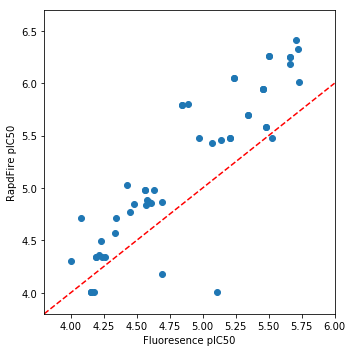

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

r_IC50_measured = pd.notnull(df_activity['r_IC50']) # in uM
f_IC50_measured = pd.notnull(df_activity['f_avg_IC50']) # in uM
both_IC50_measured = r_IC50_measured * f_IC50_measured

df_both_measured = df_activity[both_IC50_measured]

plt.figure(figsize=(5,5))
xmin, xmax = 3.8, 6.0
ymin, ymax = 3.8, 6.7
plt.plot([xmin, xmax], [xmin, xmax], 'r--')
plt.plot(-1.0*np.log10(1.0e-6*df_both_measured['f_avg_IC50']), -1.0*np.log10(1.0e-6*df_both_measured['r_IC50']), 'o')
plt.xlabel('Fluoresence pIC50')
plt.ylabel('RapdFire pIC50')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.tight_layout()
plt.show()

## IC50 values

Next, let's find all the entries in the table that have (fluorescence) IC50 calues measured.

In [8]:
# Find all that have IC50 data
df_IC50 = df_activity[f_IC50_measured]
print(df_IC50)
print(df_IC50.shape)

                                                SMILES                  CID  \
2                     N#Cc1cccc(CN2CCN(C(=O)CCl)CC2)c1   MAT-POS-ee51dedd-1   
3                   O=C(CCl)N1CCN(S(=O)(=O)c2ccsc2)CC1   MAT-POS-ee51dedd-2   
4              O=C(CCl)N1CCCc2cc(NCc3ccc(F)cc3Cl)ccc21   MAT-POS-ee51dedd-3   
5         O=C(c1cc(=O)[nH]c2ccccc12)N1CCN(c2ccccc2)CC1   EDJ-MED-78f964c8-1   
7                         Cc1ccncc1NC(=O)Nc1cccc(Cl)c1   JAG-UCB-cedd89ab-8   
8              O=C(CCl)N1CCN(S(=O)(=O)C2=CC[SH]=C2)CC1   MAK-UNK-d4768348-1   
10                  O=C(CCl)N1CCN(Cc2cc(O)cc(Cl)c2)CC1   MAT-POS-2db6411e-2   
13                        O=C(CCl)Nc1cccc(N2CCCC2=O)c1  MAK-UNK-7a704a63-10   
14                          O=C(CCl)N1CCN(Cc2ccsc2)CC1   MAK-UNK-212f693e-8   
21                  O=C(CCl)N1CCN(S(=O)(=O)c2cccs2)CC1  AAR-POS-d2a4d1df-22   
22              O=C(CCl)N1CCN(S(=O)(=O)c2cccc(F)c2)CC1  AAR-POS-d2a4d1df-23   
23             O=C(CCl)N1CCN(S(=O)(=O)c2c(F)cccc2F)C

Are _any_ of these compounds in our current scrape of the results?

We first need to make sure we can get the "new" CID for all our compounds...

In [9]:
# Translate the new IDs back to the old IDs so we can find them in our results

## make a translation table
df_submissions = pd.read_csv("https://covid.postera.ai/covid/submissions.csv")
print(df_submissions.columns)

Index(['SMILES', 'CID', 'CID (canonical)', 'CID (old format)', 'Postera Link',
       'InChIKey', 'Submission Creator', 'Submission Rationale',
       'Submission Notes', 'Submission Fragments', 'Structure ID',
       'Fragalysis Link', 'Enamine - REAL Space',
       'Enamine - Extended REAL Space', 'Enamine - SCR', 'Enamine - BB',
       'Mcule', 'Mcule Ultimate', 'In Molport or Mcule', 'In eMolecules',
       'Ordered', 'Made', 'Assayed', 'MW', 'cLogP', 'TPSA', 'Rotatable Bonds',
       'Fraction sp3', 'HBA', 'HBD', 'Covalent Fragment', 'Covalent Warhead',
       'Acrylamide', 'Acrylamide Adduct', 'Chloroacetamide',
       'Chloroacetamide Adduct', 'Vinylsulfonamide', 'Vinylsulfonamide Adduct',
       'Nitrile', 'Nitrile Adduct', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_IC50', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50',
       'f_max_inhibition_reading', 'f_min_inhibition_reading', 'f_hill_slope',
       'f_R2', 'relative_s

In [10]:
# There are "CID" and "canonical_CID" names -- YUCK.   We need to make a translation table
# for ALL of the compounds in the activity_data.csv, i.e.
#
# df_activity['CID']  --> our scraped 'identity'  (the old CID)

CID_list = list(df_submissions['CID'])
CID_canonical_list = list(df_submissions['CID (canonical)'])
CID_old_list = list(df_submissions['CID (old format)'])

activity2pkl_CID = {}

# TESTING
"""for s in df_activity['CID']:
    print(s, end=' ')
    i = CID_list.index(s)
    print(CID_list[i], CID_canonical_list[i], CID_old_list[i], end=' ')
    is_it_nan = False
    try:
        is_it_nan = np.isnan(CID_old_list[i])  # the isnan function is finicky when the input is not nan!!!!
    except:
        pass
    print(is_it_nan)
"""

for s in df_activity['CID']:
    
    # is this in the submissions  CID list?
    if CID_list.count(s) > 0:
        is_it_nan = False
        try:
            is_it_nan = np.isnan(CID_old_list[CID_list.index(s)])  # the isnan function is finicky when the input is not nan!!!!
        except:
            pass
        if not is_it_nan:
            activity2pkl_CID[s] = CID_old_list[CID_list.index(s)]
            print(s, '--> CID_old =', CID_old_list[CID_list.index(s)])
    
    else:
        # is this in the submssions CID_canonical_list?
        if CID_canonical_list.count(s) > 0:
            is_it_nan = False
            try:
                is_it_nan = np.isnan(CID_old_list[CID_canonical_list.index(s)])  # the isnan function is finicky when the input is not nan!!!!
            except:
                pass
            if not is_it_nan:
                activity2pkl_CID[s] = CID_old_list[CID_canonical_list.index(s)]
                print(s, '--> CID_old =', CID_old_list[CID_canonical_list.index(s)])


FRA-BIO-8bf1eac9-1 --> CID_old = FRA-BIO-8bf-1
FRA-BIO-8bf1eac9-12 --> CID_old = FRA-BIO-8bf-12
JOR-UNI-2fc98d0b-6 --> CID_old = JOR-UNI-2fc-6
JOR-UNI-2fc98d0b-12 --> CID_old = JOR-UNI-2fc-12
WAR-XCH-b72a1bbc-1 --> CID_old = WAR-XCH-b72-1
WAR-XCH-b72a1bbc-4 --> CID_old = WAR-XCH-b72-4
WAR-XCH-b72a1bbc-7 --> CID_old = WAR-XCH-b72-7
WAR-XCH-b72a1bbc-8 --> CID_old = WAR-XCH-b72-8
WAR-XCH-b72a1bbc-9 --> CID_old = WAR-XCH-b72-9
WAR-XCH-b72a1bbc-10 --> CID_old = WAR-XCH-b72-10
WAR-XCH-b72a1bbc-14 --> CID_old = WAR-XCH-b72-14
WAR-XCH-b72a1bbc-15 --> CID_old = WAR-XCH-b72-15
WAR-XCH-b72a1bbc-16 --> CID_old = WAR-XCH-b72-16
WAR-XCH-b72a1bbc-18 --> CID_old = WAR-XCH-b72-18
WAR-XCH-b72a1bbc-20 --> CID_old = WAR-XCH-b72-20
WAR-XCH-b72a1bbc-23 --> CID_old = WAR-XCH-b72-23
WAR-XCH-b72a1bbc-39 --> CID_old = WAR-XCH-b72-39
WAR-XCH-b72a1bbc-48 --> CID_old = WAR-XCH-b72-48
WAR-XCH-b72a1bbc-49 --> CID_old = WAR-XCH-b72-49
FAR-UNI-a04c1544-1 --> CID_old = FAR-UNI-a04-1
ALE-UNK-fca05062-1 --> CID_old = ALE

In [11]:
# Load in our latest results
df_results = pd.read_pickle('master_results_WL0.12_052920.pkl')
df_results

,dataset,fah,identity,receptor,score,febkT,error,ns_RL,ns_L,wl_RL,L_error,RL_error
280,MS0406-2_v2,PROJ14727/RUN360,CHR-SOS-709-10,Mpro-x0161_0.pdb,-9.904811,-23.717675,3.732936,[17],"[200, 200, 200, 200, 200]",[0.11807],4.819040e-01,-7.216450e-17
157,MS0323_v3,PROJ14822/RUN348,NIM-UNI-36e-2,protein-0387.pdb,-4.940938,-23.566885,14.298449,[126],"[660, 520, 470, 500, 480]",[0.11806],7.982983e+00,0.000000e+00
278,MS0326_v3,PROJ14823/RUN2582,SEL-UNI-842-3,Mpro-x1374-protein.pdb,-3.871179,-21.013849,2.539107,[95],"[200, 200, 200, 200, 200]",[0.11806],2.125457e-01,9.298118e-17
96,MS0326_v3,PROJ14823/RUN2907,√ÅLV-UNI-7ff-30,Mpro-x0426-protein.pdb,-3.598034,-19.215648,2.326442,[84],"[200, 200, 200, 200, 200]",[0.11806],4.201022e-02,-2.081668e-18
222,MS0323_v3,PROJ14822/RUN439,TRY-UNI-1fd-7,protein-0387.pdb,-4.657867,-18.615354,3.869574,[78],"[620, 360, 280, 330, 330]",[0.11806],9.782961e-01,3.497203e-16
115,MS0326_v2,PROJ14723/RUN2743,√ÅLV-UNI-7ff-14,Mpro-x0540-protein.pdb,-3.156784,-18.329687,5.958366,[82],"[200, 200, 200, 200, 200]",[0.075558],2.799272e+00,4.440892e-17
99,MS0326_v2,PROJ14724/RUN558,MIH-UNI-6b9-5,Mpro-x0434-protein.pdb,-7.490286,-17.671399,2.440249,[104],"[200, 200, 200, 200, 200]",[0.11806],7.325743e-02,-6.938894e-19
108,MS0323_v3,PROJ14822/RUN273,KIM-UNI-60f-3,protein-0387.pdb,-5.156190,-16.640181,15.374063,[87],"[380, 460, 410, 350, 400]",[0.11806],8.623502e+00,-8.437695e-16
81,MS0326_v3,PROJ14823/RUN2833,√ÅLV-UNI-7ff-22,Mpro-x1093-protein.pdb,-6.421802,-16.175649,2.349765,[92],"[200, 200, 200, 200, 200]",[0.11806],5.461608e-02,-1.630640e-16
240,MS0326_v3,PROJ14823/RUN2508,DAR-DIA-842-7,Mpro-x0678-protein.pdb,-9.765095,-16.057317,3.344436,[129],"[200, 200, 200, 200, 200]",[0.11806],7.239954e-01,0.000000e+00


In [12]:
## Are these in the latest results pkl???
IC50_measured = pd.notnull(df_activity['f_avg_IC50'])

for s in df_activity[IC50_measured].CID:
    try:
        df_hits = df_results[df_results.identity.str.contains(activity2pkl_CID[s])]
        if len(df_hits) > 0:
            print(s, '<--', activity2pkl_CID[s])
            print(df_hits)
            print('\n##########\n\n')
    except:
        pass

CHR-SOS-7098f804-10 <-- CHR-SOS-709-10
         dataset               fah        identity          receptor  \
280  MS0406-2_v2  PROJ14727/RUN360  CHR-SOS-709-10  Mpro-x0161_0.pdb   

        score      febkT     error ns_RL                       ns_L  \
280 -9.904811 -23.717675  3.732936  [17]  [200, 200, 200, 200, 200]   

         wl_RL   L_error      RL_error  
280  [0.11807]  0.481904 -7.216450e-17  

##########


TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
      dataset               fah       identity                receptor  \
61  MS0326_v2  PROJ14724/RUN149  TRY-UNI-714-6  Mpro-x0678-protein.pdb   

        score     febkT     error ns_RL                       ns_L  \
61 -10.387289 -5.737714  4.077489  [87]  [200, 200, 200, 200, 200]   

         wl_RL  L_error  RL_error  
61  [0.094448]  0.87809       0.0  

##########


TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
       dataset               fah        identity                receptor  \
347  MS0326_v2  PROJ14724/RUN212  TRY-UNI-714-22 

In [13]:
def febkT_to_KD(febkT, dG_rest=2.0, box_length=8.2947):
    """Converts our febkT value to a K_D value in (M = mol/L).
    
    INPUT
    febkT      - our febkT score (in kT)
    
    PARAMETERS
    dG_rest    - the free energy of *restraining* the ligand (in kT)
                 NOTE: this should be a positive number
    box_length - the simulated PBC box length (in nm).
                 NOTE: a cubic box is assumed
    
    RETURNS
    K_D      - the estimated K_D value (in M)"""
    
    # Convert the box length to a simulated concentration
    N_A = 6.022e23
    V_0 = (box_length/1.0e8)**3   # in dm^3 = L
    simulated_conc = 1.0/(N_A*V_0)

    dG_standard = febkT - dG_rest + np.log(simulated_conc)
    K_D = np.exp(dG_standard)
    
    return K_D

## There may be enough data for a scatter plot...

GAB-REV-70cc3ca5-8 <-- GAB-REV-70c-8
CHR-SOS-7098f804-10 <-- CHR-SOS-709-10
Best scoring febkT: -23.717674680282585
24.1845155987681
CHR-SOS-7098f804-14 <-- CHR-SOS-709-14
TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
Best scoring febkT: -5.737714380000014
24.5666191954425
TRY-UNI-714a760b-12 <-- TRY-UNI-714-12
TRY-UNI-714a760b-18 <-- TRY-UNI-714-18
TRY-UNI-714a760b-20 <-- TRY-UNI-714-20
TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
Best scoring febkT: -1.5223928289795765
54.9421036995899
TRY-UNI-714a760b-24 <-- TRY-UNI-714-24
LON-WEI-8f408cad-1 <-- LON-WEI-8f4-1
LON-WEI-8f408cad-2 <-- LON-WEI-8f4-2
LON-WEI-8f408cad-3 <-- LON-WEI-8f4-3
LON-WEI-8f408cad-4 <-- LON-WEI-8f4-4
LON-WEI-8f408cad-5 <-- LON-WEI-8f4-5
LON-WEI-8f408cad-7 <-- LON-WEI-8f4-7
LON-WEI-8f408cad-8 <-- LON-WEI-8f4-8
SIM-SYN-f15aaa3a-1 <-- SIM-SYN-f15-1
WAR-XCH-79d12f6e-4 <-- WAR-XCH-79d-4
WAR-XCH-79d12f6e-6 <-- WAR-XCH-79d-6
NEH-REV-107bcf72-5 <-- NEH-REV-107-5
PAU-UNI-8cdd41c7-1 <-- PAU-UNI-8cd-1
MAK-UNK-af83ef51-2 <-- MAK-UNK-af8-2
ME

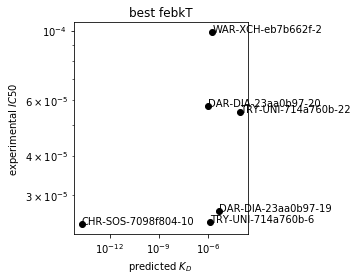

In [17]:

### make a scatter plot of predicted K_D and experimental IC50
IC50_measured = pd.notnull(df_activity['f_avg_IC50'])
df_IC50 = df_activity[IC50_measured]


from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,4))

for s in df_IC50.CID:
# for s in df_activity_avg20.CID:
    try:
        print(s, '<--', activity2pkl_CID[s])
        df_hits = df_results[df_results.identity.str.contains(activity2pkl_CID[s])]
        if len(df_hits) > 0:
            best_febkT = np.min(df_hits["febkT"])
            print('Best scoring febkT:', best_febkT)

            # get the IC50
            print(list(df_IC50[df_IC50.CID == s]['f_avg_IC50'])[0])
            IC50 = list(df_IC50[df_IC50.CID == s]['f_avg_IC50'])[0]

            plt.plot(febkT_to_KD(best_febkT), IC50*1e-6, 'ko', label=s)
            plt.text(febkT_to_KD(best_febkT), IC50*1e-6, s)

    except:
        pass

plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('best febkT')


plt.tight_layout()
plt.show()

### Has our FEP  enriched for the ACTIVEs?

/Users/vv/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


JOR-UNI-2fc98d0b-6 <-- JOR-UNI-2fc-6
JOR-UNI-2fc98d0b-12 <-- JOR-UNI-2fc-12
GAB-REV-70cc3ca5-8 <-- GAB-REV-70c-8
CHR-SOS-7098f804-10 <-- CHR-SOS-709-10
CHR-SOS-7098f804-14 <-- CHR-SOS-709-14
TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
TRY-UNI-714a760b-12 <-- TRY-UNI-714-12
TRY-UNI-714a760b-18 <-- TRY-UNI-714-18
TRY-UNI-714a760b-20 <-- TRY-UNI-714-20
TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
JOO-IND-6372a4f3-6 <-- JOO-IND-637-6
JOH-UNI-c7afdb96-4 <-- JOH-UNI-c7a-4
LON-WEI-8f408cad-1 <-- LON-WEI-8f4-1
LON-WEI-8f408cad-2 <-- LON-WEI-8f4-2
LON-WEI-8f408cad-3 <-- LON-WEI-8f4-3
LON-WEI-8f408cad-4 <-- LON-WEI-8f4-4
LON-WEI-8f408cad-5 <-- LON-WEI-8f4-5
LON-WEI-8f408cad-7 <-- LON-WEI-8f4-7
SER-UNI-985a0e14-4 <-- SER-UNI-985-4
WAR-XCH-79d12f6e-4 <-- WAR-XCH-79d-4
NEH-REV-107bcf72-5 <-- NEH-REV-107-5
PAU-UNI-8cdd41c7-1 <-- PAU-UNI-8cd-1
TAM-UNI-d1c3dd9f-5 <-- TAM-UNI-d1c-5
TAM-UNI-d1c3dd9f-18 <-- TAM-UNI-d1c-18
MAK-UNK-af83ef51-2 <-- MAK-UNK-af8-2
MED-COV-4280ac29-5 <-- MED-COV-428-5
MED-COV-4280ac29-13 <-

JOH-MSK-35a8745a-1 <-- JOH-MSK-35a-1
GIA-UNK-eaadd1d4-1 <-- GIA-UNK-eaa-1
GIA-UNK-eaadd1d4-3 <-- GIA-UNK-eaa-3
MIH-UNI-6b9ca91a-5 <-- MIH-UNI-6b9-5
DUN-NEW-f8ce3686-1 <-- DUN-NEW-f8c-1
DUN-NEW-f8ce3686-14 <-- DUN-NEW-f8c-14
HAN-NEW-5f56c3bc-1 <-- HAN-NEW-5f5-1
AGN-NEW-c7b24fe3-3 <-- AGN-NEW-c7b-3
AGN-NEW-c7b24fe3-4 <-- AGN-NEW-c7b-4
ANN-UNI-26382800-3 <-- ANN-UNI-263-3
ANN-UNI-26382800-4 <-- ANN-UNI-263-4
ANN-UNI-26382800-5 <-- ANN-UNI-263-5
ANN-UNI-26382800-6 <-- ANN-UNI-263-6
ANT-STE-dbb91f63-1 <-- ANT-STE-dbb-1
PAT-GYR-359dbb24-1 <-- PAT-GYR-359-1
ANT-DIA-3c79be55-4 <-- ANT-DIA-3c7-4
TRY-UNI-1fd04853-5 <-- TRY-UNI-1fd-5
TRY-UNI-1fd04853-7 <-- TRY-UNI-1fd-7
TRY-UNI-1fd04853-8 <-- TRY-UNI-1fd-8
TRY-UNI-1fd04853-9 <-- TRY-UNI-1fd-9
TRY-UNI-1fd04853-10 <-- TRY-UNI-1fd-10
TRY-UNI-1fd04853-11 <-- TRY-UNI-1fd-11
TRY-UNI-1fd04853-12 <-- TRY-UNI-1fd-12
ANT-DIA-b7f58f21-2 <-- ANT-DIA-b7f-2
WAR-XCH-eb7b662f-1 <-- WAR-XCH-eb7-1
PAT-UNK-b2d83456-1 <-- PAT-UNK-b2d-1
DAR-DIA-23aa0b97-1 <-- DAR-DIA

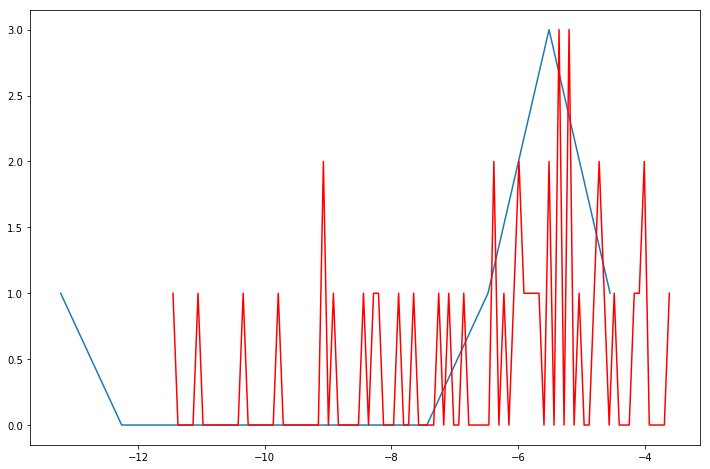

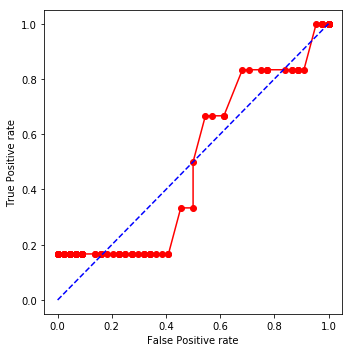

In [15]:
activity_threshold = 20.0  # percentage

# Find all that have activity above the thresh -- we'll call this ACTIVE
avg20_measured = pd.notnull(df_activity['f_inhibition_at_20_uM']) 
avg20_active = df_activity['f_inhibition_at_20_uM'] > activity_threshold
df_active = df_activity[avg20_measured*avg20_active]


# Find ones that hd activity below the thresh  -- we'll call this INACTIVE
avg20_inactive = df_activity['f_inhibition_at_20_uM'] < activity_threshold
df_inactive = df_activity[avg20_measured*avg20_inactive]

pred_Kd_actives_best, pred_Kd_actives_avg = [], []
pred_Kd_inactives_best, pred_Kd_inactives_avg = [], []

for s in df_active.CID:
    if s in activity2pkl_CID.keys():
        print(s, '<--', activity2pkl_CID[s])
        selection = df_results.identity.str.contains(activity2pkl_CID[s]) # * df_results.dataset.str.contains('v2')
        df_hits = df_results[selection]
        if len(df_hits) > 0:
            best_febkT = np.min(df_hits["febkT"])
            # print('Best scoring febkT:', best_febkT)
            pred_Kd_actives_best.append(febkT_to_KD(best_febkT))

            avg_febkT = np.mean(df_hits["febkT"])
            #print('Avg scoring febkT:', avg_febkT)
            pred_Kd_actives_avg.append(febkT_to_KD(avg_febkT))

for s in df_inactive.CID:
    if s in activity2pkl_CID.keys():
        print(s, '<--', activity2pkl_CID[s])
        selection = df_results.identity.str.contains(activity2pkl_CID[s]) # * df_results.dataset.str.contains('v2')
        df_hits = df_results[selection]
        if len(df_hits) > 0:
            best_febkT = np.min(df_hits["febkT"])
            # print('Best scoring febkT:', best_febkT)
            pred_Kd_inactives_best.append(febkT_to_KD(best_febkT))
            avg_febkT = np.mean(df_hits["febkT"])
            #print('Avg scoring febkT:', avg_febkT)
            pred_Kd_inactives_avg.append(febkT_to_KD(avg_febkT))

# How many did we get?
print('len(pred_Kd_actives_best) =', len(pred_Kd_actives_best))
pred_Kd_actives_best = np.array(pred_Kd_actives_best)
print(pred_Kd_actives_best)

# How many did we get?
print('len(pred_Kd_inactives_best) =', len(pred_Kd_inactives_best))
print(pred_Kd_inactives_best)
pred_Kd_inactives_best = np.array(pred_Kd_inactives_best)


from matplotlib import pyplot as plt
%matplotlib inline

if (1):
    plt.figure(figsize=(12,8))
    counts, bin_edges = np.histogram(np.log10(pred_Kd_actives_best), bins=10)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts)

    counts, bin_edges = np.histogram(np.log10(pred_Kd_inactives_best), bins=100)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts, 'r-')
    plt.show()
    
if (1):
    
    # Build a ROC curve
    plt.figure(figsize=(5,5))
    
    log_pred_Kd_actives_best   = np.log10(pred_Kd_actives_best)
    log_pred_Kd_inactives_best = np.log10(pred_Kd_inactives_best
                                         )
    logKd_cutoffs = np.arange(-12.,+10., 0.1)
    TP_rate, FP_rate = [], []
    for logKd in logKd_cutoffs:
        
        ntrue = len(pred_Kd_actives_best[log_pred_Kd_actives_best < logKd])
        nactive =  len(pred_Kd_actives_best)
        TP_rate.append( float(ntrue)/float(nactive) )
        
        nfalse = len(pred_Kd_inactives_best[log_pred_Kd_inactives_best < logKd])
        ninactive =  len(pred_Kd_inactives_best)
        FP_rate.append( float(nfalse)/float(ninactive) )
        
        
    plt.plot(FP_rate, TP_rate, 'ro-')
    plt.plot([0,1],[0,1], 'b--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.tight_layout()
    plt.show()


In [16]:
## Are these in the latest master_pkl???

df_master = pd.read_pickle('../FEP/dataframes/master_FEP.pkl')

for s in df_activity[IC50_measured].CID:

    df_hits = df_master[df_master.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        if (0):
            print('FOUND:', s, '<--', new2old_CID[s])
            print(df_hits)
            print('\n##########\n\n')
        # print(new2old_CID[s])
    else:
        print('NOT FOUND!!!!! ', s, '<--', new2old_CID[s])

NameError: name 'new2old_CID' is not defined

## AVG inhibition at 20 µM

In [6]:
# Find all that have "AVG % Inhibition at 20 uM" data -- make sure not negative!
avg20_measured = pd.notnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_not_neg = df_activity["AVG % Inhibition at 20 uM"] > 0
df_activity_avg20 = df_activity[avg20_measured*avg20_not_neg]



/Users/vv/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


ALV-UNI-7ff1a6f9-47 <-- ÁLV-UNI-7ff-47
ALV-UNI-7ff1a6f9-45 <-- ÁLV-UNI-7ff-45
WAR-XCH-eb7b662f-2 <-- WAR-XCH-eb7-2
Best scoring febkT: -12.831381276923084
Avg scoring febkT: -12.831381276923084
WAR-XCH-b72a1bbc-9 <-- WAR-XCH-b72-9
Best scoring febkT: 1.5091270391741816
Avg scoring febkT: 1.5091270391741816
WAR-XCH-b72a1bbc-7 <-- WAR-XCH-b72-7
Best scoring febkT: -3.225703480824743
Avg scoring febkT: 0.3819343117762089
WAR-XCH-b72a1bbc-49 <-- WAR-XCH-b72-49
Best scoring febkT: 6.666060131607009
Avg scoring febkT: 6.666060131607009
WAR-XCH-b72a1bbc-16 <-- WAR-XCH-b72-16
Best scoring febkT: 1.135092755135716
Avg scoring febkT: 2.9989946715370612
WAR-XCH-b72a1bbc-15 <-- WAR-XCH-b72-15
Best scoring febkT: -2.393161781538474
Avg scoring febkT: 1.820366993971734
WAR-XCH-b72a1bbc-14 <-- WAR-XCH-b72-14
Best scoring febkT: -7.862138608860894
Avg scoring febkT: 0.5223953490432804
WAR-XCH-b6889685-30 <-- WAR-XCH-b68-30
Best scoring febkT: 6.530040599999978
Avg scoring febkT: 6.530040599999978
WAR-

/Users/vv/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


LON-WEI-b8d98729-33 <-- LON-WEI-b8d-33
LON-WEI-b8d98729-32 <-- LON-WEI-b8d-32
LON-WEI-b8d98729-31 <-- LON-WEI-b8d-31
LON-WEI-b8d98729-30 <-- LON-WEI-b8d-30
LON-WEI-b8d98729-29 <-- LON-WEI-b8d-29
LON-WEI-b8d98729-28 <-- LON-WEI-b8d-28
LON-WEI-b8d98729-27 <-- LON-WEI-b8d-27
LON-WEI-b8d98729-26 <-- LON-WEI-b8d-26
LON-WEI-b8d98729-25 <-- LON-WEI-b8d-25
LON-WEI-b8d98729-24 <-- LON-WEI-b8d-24
LON-WEI-b8d98729-23 <-- LON-WEI-b8d-23
LON-WEI-b8d98729-22 <-- LON-WEI-b8d-22
LON-WEI-b8d98729-21 <-- LON-WEI-b8d-21
LON-WEI-b8d98729-20 <-- LON-WEI-b8d-20
LON-WEI-b8d98729-2 <-- LON-WEI-b8d-2
LON-WEI-b8d98729-19 <-- LON-WEI-b8d-19
LON-WEI-b8d98729-18 <-- LON-WEI-b8d-18
LON-WEI-b8d98729-17 <-- LON-WEI-b8d-17
LON-WEI-b8d98729-16 <-- LON-WEI-b8d-16
LON-WEI-b8d98729-15 <-- LON-WEI-b8d-15
LON-WEI-b8d98729-14 <-- LON-WEI-b8d-14
LON-WEI-b8d98729-13 <-- LON-WEI-b8d-13
LON-WEI-b8d98729-12 <-- LON-WEI-b8d-12
LON-WEI-b8d98729-11 <-- LON-WEI-b8d-11
LON-WEI-b8d98729-10 <-- LON-WEI-b8d-10
LON-WEI-b8d98729-1 <-- LON-

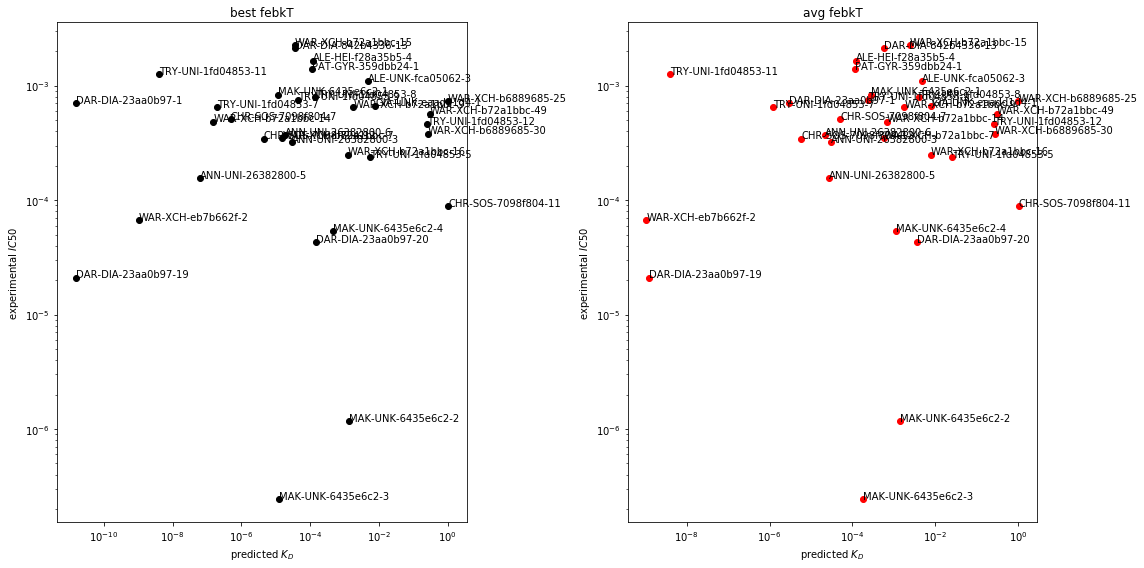

In [7]:


### make a scatter plot of predicted K_D and experimental IC50

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))

for s in df_activity_avg20.CID:
    print(s, '<--', new2old_CID[s])
    df_hits = df_results[df_results.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        print('Best scoring febkT:', best_febkT)

        avg_febkT = np.mean(df_hits["febkT"])
        print('Avg scoring febkT:', avg_febkT)

        # Convert to a VERY ROUGH IC50 measurement
        f = list(df_activity_avg20[df_activity_avg20.CID == s]["AVG % Inhibition at 20 uM"]/100.0)[0]
        Kd_activity_avg20 = 20.0*1e-6 * (1.0-f)/f  # in units M
        #print(Kd_activity_avg20)
        #print('\n##########\n\n')
        
        plt.subplot(1,2,1)
        plt.plot(febkT_to_KD(best_febkT), Kd_activity_avg20, 'ko', label=s)
        plt.text(febkT_to_KD(best_febkT), Kd_activity_avg20, s)
        
        plt.subplot(1,2,2)
        plt.plot(febkT_to_KD(avg_febkT), Kd_activity_avg20, 'ro', label=s)
        plt.text(febkT_to_KD(avg_febkT), Kd_activity_avg20, s)

plt.subplot(1,2,1)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('best febkT')

plt.subplot(1,2,2)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('avg febkT')

plt.tight_layout()
plt.show()

## Next, let's filter out only the v3 predictions

ALV-UNI-7ff1a6f9-47 <-- ÁLV-UNI-7ff-47
ALV-UNI-7ff1a6f9-45 <-- ÁLV-UNI-7ff-45
WAR-XCH-eb7b662f-2 <-- WAR-XCH-eb7-2
WAR-XCH-b72a1bbc-9 <-- WAR-XCH-b72-9
WAR-XCH-b72a1bbc-7 <-- WAR-XCH-b72-7
Best scoring febkT: -0.9918043826262632
Avg scoring febkT: -0.9918043826262632
WAR-XCH-b72a1bbc-49 <-- WAR-XCH-b72-49
WAR-XCH-b72a1bbc-16 <-- WAR-XCH-b72-16
Best scoring febkT: 2.5577223739832675
Avg scoring febkT: 4.802962373983263
WAR-XCH-b72a1bbc-15 <-- WAR-XCH-b72-15
Best scoring febkT: -2.393161781538474
Avg scoring febkT: -2.393161781538474
WAR-XCH-b72a1bbc-14 <-- WAR-XCH-b72-14
Best scoring febkT: 0.10031505836734844
Avg scoring febkT: 2.3444870991836746
WAR-XCH-b6889685-30 <-- WAR-XCH-b68-30
WAR-XCH-b6889685-25 <-- WAR-XCH-b68-25
AAR-POS-0daf6b7e-19 <-- None-19
AAR-POS-0daf6b7e-9 <-- None-9
TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
TRY-UNI-714a760b-5 <-- TRY-UNI-714-5
TRY-UNI-714a760b-24 <-- TRY-UNI-714-24
TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
TRY-UNI-714a760b-20 <-- TRY-UNI-714-20
JAN-GHE-83b26c

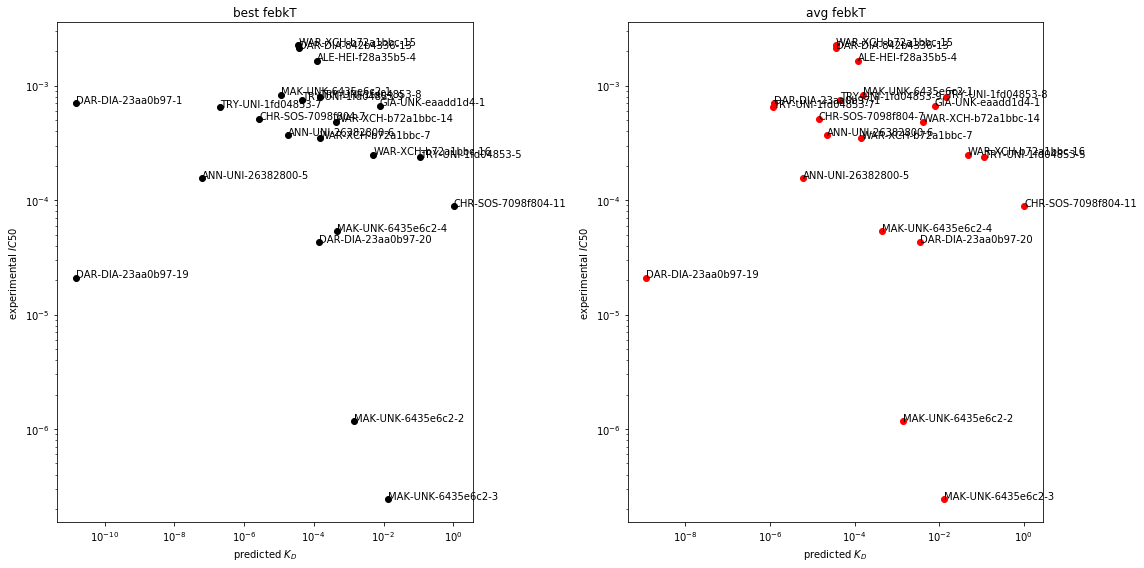

In [8]:
### make a scatter plot of predicted K_D and experimental IC50

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))

for s in df_activity_avg20.CID:
    print(s, '<--', new2old_CID[s])
    
    selection = df_results.identity.str.contains(new2old_CID[s]) * df_results.dataset.str.contains('v3')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        print('Best scoring febkT:', best_febkT)

        avg_febkT = np.mean(df_hits["febkT"])
        print('Avg scoring febkT:', avg_febkT)

        # Convert to a VERY ROUGH IC50 measurement
        f = list(df_activity_avg20[df_activity_avg20.CID == s]["AVG % Inhibition at 20 uM"]/100.0)[0]
        Kd_activity_avg20 = 20.0*1e-6 * (1.0-f)/f  # in units M
        #print(Kd_activity_avg20)
        #print('\n##########\n\n')
        
        plt.subplot(1,2,1)
        plt.plot(febkT_to_KD(best_febkT), Kd_activity_avg20, 'ko', label=s)
        plt.text(febkT_to_KD(best_febkT), Kd_activity_avg20, s)
        
        plt.subplot(1,2,2)
        plt.plot(febkT_to_KD(avg_febkT), Kd_activity_avg20, 'ro', label=s)
        plt.text(febkT_to_KD(avg_febkT), Kd_activity_avg20, s)

plt.subplot(1,2,1)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('best febkT')

plt.subplot(1,2,2)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('avg febkT')

plt.tight_layout()
plt.savefig('IC50-correlation-v3only.pdf')
plt.show()

### Another question: Could our FEP have enriched for the ACTIVEs?


/Users/vv/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


len(pred_Kd_actives_best) = 5
[1.05358639e-09 1.24544614e-05 1.43828856e-04 1.49163194e-11
 6.12855010e-08]
len(pred_Kd_inactives_best) = 20
[1.5644547757833535e-05, 3.596924146484856e-05, 1.516298905744072e-07, 8.077940934844104e-07, 4.4619091596881895e-05, 0.00014167264384105493, 1.986328936963077e-07, 3.928355323933316e-09, 7.037493503217927e-06, 0.00011644197172705463, 1.1757656538241654e-05, 0.00032483742582960006, 2.2641508925906878e-06, 3.7065461969548944e-05, 1.491631939720664e-11, 4.829343990022032e-07, 4.399372822552591e-06, 1.8494807934016807e-05, 3.040296743634517e-05, 0.00011981874107723044]


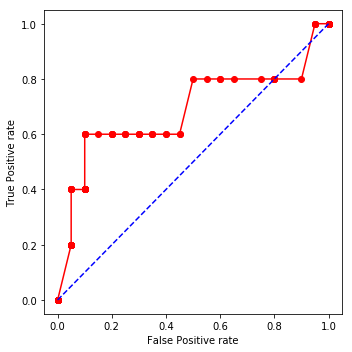

In [62]:
activity_threshold = 10.0  # percentage

# df_results = pd.read_pickle('results_051220_WL0.12.pkl')
df_results = pd.read_pickle('master_results_WL0.12.pkl')


# Find all that have "AVG % Inhibition at 20 uM" data above 10% -- we'll call this ACTIVE
avg20_measured = pd.notnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_active = df_activity["AVG % Inhibition at 20 uM"] > activity_threshold
df_active = df_activity[avg20_measured*avg20_active]


# Find ones that were measured to be LESS than 10% -- we'll call this INACTIVE
#avg20_notmeasured = pd.isnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_inactive = df_activity["AVG % Inhibition at 20 uM"] < activity_threshold
df_inactive = df_activity[avg20_measured*avg20_inactive]

pred_Kd_actives_best, pred_Kd_actives_avg = [], []
pred_Kd_inactives_best, pred_Kd_inactives_avg = [], []

for s in df_active.CID:
    #print(s, '<--', new2old_CID[s])
    selection = df_results.identity.str.contains(new2old_CID[s]) # * df_results.dataset.str.contains('v2')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        # print('Best scoring febkT:', best_febkT)
        pred_Kd_actives_best.append(febkT_to_KD(best_febkT))

        avg_febkT = np.mean(df_hits["febkT"])
        #print('Avg scoring febkT:', avg_febkT)
        pred_Kd_actives_avg.append(febkT_to_KD(avg_febkT))

for s in df_inactive.CID:
    #print(s, '<--', new2old_CID[s])
    selection = df_results.identity.str.contains(new2old_CID[s]) # * df_results.dataset.str.contains('v2')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        # print('Best scoring febkT:', best_febkT)
        pred_Kd_inactives_best.append(febkT_to_KD(best_febkT))
        avg_febkT = np.mean(df_hits["febkT"])
        #print('Avg scoring febkT:', avg_febkT)
        pred_Kd_inactives_avg.append(febkT_to_KD(avg_febkT))

# How many did we get?
print('len(pred_Kd_actives_best) =', len(pred_Kd_actives_best))
pred_Kd_actives_best = np.array(pred_Kd_actives_best)
print(pred_Kd_actives_best)

# How many did we get?
print('len(pred_Kd_inactives_best) =', len(pred_Kd_inactives_best))
print(pred_Kd_inactives_best)
pred_Kd_inactives_best = np.array(pred_Kd_inactives_best)


from matplotlib import pyplot as plt
%matplotlib inline

if (0):
    plt.figure(figsize=(12,8))
    counts, bin_edges = np.histogram(np.log10(pred_Kd_actives_best), bins=10)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts)

    counts, bin_edges = np.histogram(np.log10(pred_Kd_inactives_best), bins=100)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts, 'r-')
    plt.show()
    
if (1):
    
    # Build a ROC curve
    plt.figure(figsize=(5,5))
    
    log_pred_Kd_actives_best   = np.log10(pred_Kd_actives_best)
    log_pred_Kd_inactives_best = np.log10(pred_Kd_inactives_best
                                         )
    logKd_cutoffs = np.arange(-12.,+10., 0.1)
    TP_rate, FP_rate = [], []
    for logKd in logKd_cutoffs:
        
        ntrue = len(pred_Kd_actives_best[log_pred_Kd_actives_best < logKd])
        nactive =  len(pred_Kd_actives_best)
        TP_rate.append( float(ntrue)/float(nactive) )
        
        nfalse = len(pred_Kd_inactives_best[log_pred_Kd_inactives_best < logKd])
        ninactive =  len(pred_Kd_inactives_best)
        FP_rate.append( float(nfalse)/float(ninactive) )
        
        
    plt.plot(FP_rate, TP_rate, 'ro-')
    plt.plot([0,1],[0,1], 'b--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.tight_layout()
    plt.show()


In [50]:
# Make of plot of the lambda schedule

lambda_schedule = """ 1  0.00  0.000 
 2  0.05  0.000 
 3  0.10  0.000 
 4  0.15  0.000 
 5  0.20  0.000 
 6  0.25  0.000 
 7  0.30  0.000 
 8  0.35  0.000 
 9  0.40  0.000 
10  0.45  0.000 
11  0.50  0.000 
12  0.55  0.000 
13   0.60  0.000 
14   0.65  0.000 
15   0.70  0.000 
16   0.75  0.000 
17   0.80  0.000 
18   0.85  0.000 
19   0.90  0.000 
20    0.950  0.000 
21   1.000  0.000 
22    1.000  0.100 
23    1.000  0.200 
24    1.000  0.300 
25    1.000  0.400 
26    1.000  0.450 
27    1.000  0.500 
28    1.000  0.550 
29    1.000  0.600 
30    1.000  0.630 
31   1.000  0.660 
32    1.000  0.690 
33    1.000  0.720 
34    1.000  0.750 
35    1.000  0.780 
36    1.000  0.810 
37    1.000  0.840 
38    1.000  0.880 
39    1.000  0.920 
40    1.000  1.000"""

indices, lam_coul, lam_vdw = [], [], []
for line in lambda_schedule.split('\n'):
    fields = line.strip().split()
    indices.append(int(fields[0]))
    lam_coul.append(float(fields[1]))
    lam_vdw.append(float(fields[2]))
    


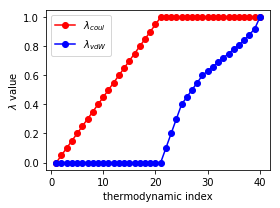

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,3))
plt.plot(indices, lam_coul, 'ro-', label='$\lambda_{coul}$')
plt.plot(indices, lam_vdw, 'bo-', label='$\lambda_{vdW}$')
plt.xlabel('thermodynamic index')
plt.ylabel('$\lambda$ value')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('lambda_schedule.pdf')
plt.show()


In [59]:
df_results = pd.read_pickle('master_results_WL0.12.pkl')
df_results = df_results.loc[(df_results.febkT < 0) & (df_results.febkT > -25)]
df_results = df_results.loc[df_results.error < 10]
df_results

,dataset,fah,identity,receptor,score,febkT,error,ns_RL,ns_L,wl_RL
139,MS0326_v3,PROJ14824/RUN580,MIH-UNI-6b9-8,Mpro-x0874-protein.pdb,-6.432608,-17.786012,1.437664,[45],"[200, 200, 200, 200, 200]",[0.11806]
51,MS0323_v3,PROJ14822/RUN237,DAR-DIA-23a-19,protein-0387.pdb,-5.253370,-17.088881,0.462442,[50],"[520, 410, 470, 410, 470]",[0.11806]
225,MS0326_v3,PROJ14823/RUN2582,SEL-UNI-842-3,Mpro-x1374-protein.pdb,-3.871179,-15.353482,0.295393,[65],"[200, 200, 200, 200, 200]",[0.11806]
23,MS0323_v3,PROJ14822/RUN32,ANT-DIA-045-3,protein-0387.pdb,-6.609026,-14.493425,2.883658,[52],"[710, 340, 450, 510, 530]",[0.11806]
142,MS0326_v3,PROJ14824/RUN293,GAB-REV-70c-9,Mpro-x0107-protein.pdb,-10.034979,-14.243884,0.182318,[55],"[200, 200, 200, 200]",[0.11806]
10,MS0326_v2,PROJ14723/RUN2855,√ÅLV-UNI-7ff-25,Mpro-x0395-protein.pdb,-5.541764,-14.116026,0.149549,[56],"[200, 200, 200, 200, 200]",[0.11806]
109,MS0326_v2,PROJ14723/RUN2799,√ÅLV-UNI-7ff-20,Mpro-x0540-protein.pdb,-3.537782,-13.921099,1.164327,"[21, 38, 36]","[200, 200, 200, 200, 200]","[0.11807, 0.11807, 0.11807]"
131,MS0323_v2,PROJ14722/RUN475,WAR-XCH-eb7-2,protein-0387.pdb,-4.555871,-12.831381,0.108680,[56],"[550, 470, 500, 500, 510]",[0.11806]
4,MS0323_v2,PROJ14722/RUN184,DAR-DIA-fc9-13,protein-0387.pdb,-5.448545,-12.811625,0.138848,[62],"[440, 480, 490, 370, 400]",[0.11806]
6,MS0326_v2,PROJ14724/RUN1648,DAR-DIA-23a-4,Mpro-x0305-protein.pdb,-4.213440,-12.784272,0.566222,[35],"[460, 500, 410, 410, 440]",[0.11806]
